<a href="https://colab.research.google.com/github/RaimondDufour/Workshop-programmeren-2/blob/main/workshop_programmeren_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Wat hebben wij vorige week gedaan?

* Vergelijkingsoperatoren;
* If-statements;
* Lijsten;
* Tekst-bewerkingen: 
    * Eenvoudige functies voor strings: tellen, zoeken, vervangen, substrings, zinnen aanpassen, maar laat je fantasie de vrije loop! (google naar python string functions);
    * regular expressions (regex);
* Een webpagina scrapen:
    * de tekst "binnenhalen";
    * de tekst opschonen met behulp van regular expressions.
    

## Wat gaan wij vandaag doen?

* Bestand opslaan (en weer openen) in Google Colabs;
* Een paar uitspraken scrapen en in een lijst zetten;
* Natural Language Processing (NLP) ofwel text mining

## Opslaan als bestand (en dan weer openen)

Er zijn verschillende manieren, maar de beste manier is om een pandas dataframe op te slaan als csv-bestand (comma separated values).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/sample_data/

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/RaimondDufour/workshopProgrammeren-/main/overwegingen.csv')
lijst2 = df.values.tolist()
lijst = []
for i in lijst2:
    overwegingen = i[0].strip()
    lijst.append(overwegingen)

In [ ]:
lijst2 = [2,3,4,5,6]
# Lijst omzetten naar pandas dataframe:
lijstDF = pd.DataFrame(lijst2)

# opslaan dataframe:
lijstDF.to_csv('bestandsnaam.csv', encoding = 'utf-8-sig', index=False)

# Openen: 
df = pd.read_csv('bestandsnaam.csv')

# Andere bestandssoorten:
# txt (.txt)
# json (.json)
# xml (.xml)
# excel (.xlsm)

## Een paar uitspraken scrapen en in een lijst zetten

Wij kunnen natuurlijk naar uitspraken.rechtspraak.nl gaan en daar de uitspraken zoeken die we willen hebben. 

Maar we kunnen ook een "api" bevragen: een Application Programming Interface
We geven een url in, en we krijgen code terug. Dat is veel snellere en gestructureerdere data-uitwisseling!

De api's voor de rechtspraak zijn:
een lijst met de laatste uitspraken: 

https://data.rechtspraak.nl/uitspraken/zoeken?modified=2023-04-03&max=10 


en de uitspraak per ecli=nummer:

https://uitspraken.rechtspraak.nl/api/document/?id=ECLI:NL:RBZWB:2023:2036

Je hoeft dan alleen maar de laatste gegevens van de url aan te passen om de juiste informatie terug te krijgen.

In [3]:
# Webpagina downloaden:
from urllib import request
url = "https://data.rechtspraak.nl/uitspraken/zoeken?modified=2023-04-03&max=10"
resp = request.urlopen(url)
html = resp.read().decode("UTF-8")
print(html)
# Hij geeft hier xml-code terug! Bij interesse: bekijk de code op: 
https://codebeautify.org/xmlviewer

<?xml version="1.0" encoding="utf-8"?><feed xmlns="http://www.w3.org/2005/Atom"><title type="text">Rechtspraak Open Data (Uitspraken)</title><subtitle type="text">Aantal gevonden ECLI's: 748</subtitle><id>uuid:a1cd3bca-b00b-439c-9f34-24c510cce02d;id=9981</id><rights type="text">Copyright 2023 Rechtspraak.</rights><updated>2023-04-03T19:52:37+02:00</updated><entry><id>ECLI:NL:RBGEL:2023:784</id><title type="text">ECLI:NL:RBGEL:2023:784, Rechtbank Gelderland, 22-02-2023, C/05/400106 / HA ZA 22-85</title><summary type="text">Beëindiging bankrelatie met particulier wegens ongebruikelijke transacties (artikel 5 lid 3 Wwft jo. 35 ABV). Vordering tot vernietiging artikel 2 en 3 Algemene bankvoorwaarden afgewezen. Algemene voorwaarden niet oneerlijk of onredelijk bezwarend. Opzegging bankrelatie niet naar maatstaven van redelijkheid en billijkheid onaanvaardbaar (artikel 6:248 lid 2 BW).</summary><updated>2023-04-03T04:00:40Z</updated><link rel="alternate" type="text/html" href="https://uitspr

In [ ]:
#De ecli-nummers eruit halen: 
import re
eclilijst = re.findall("ECLI:NL:.{2,10}:\d{4}:[A-Z0-9]{1,6}", html)
for uitspraak in eclilijst:
    print(uitspraak)

In [5]:
# Lijst ontdubbelen: (gebruik google om deze functie te vinden!)
ecliUniekeLijst = list(dict.fromkeys(eclilijst))

for ecli in ecliUniekeLijst:
    print(ecli)

ECLI:NL:RBGEL:2023:784
ECLI:NL:GHAMS:2007:BD8223
ECLI:NL:RBAMS:2023:1391
ECLI:NL:RBMNE:2023:1199
ECLI:NL:GHARL:2023:2321
ECLI:NL:RBDHA:2022:10430
ECLI:NL:RBROT:2023:2543
ECLI:NL:RBMNE:2023:1394
ECLI:NL:RBZWB:2023:2036
ECLI:NL:RBZWB:2023:2038


In [6]:
# alle uitspraken opvragen:
uitsprakenlijst = []
for ecli in ecliUniekeLijst:
    url = "https://uitspraken.rechtspraak.nl/api/document/?id=" + ecli
    resp = request.urlopen(url)
    html = resp.read().decode("UTF-8")
    toevoeging = [ecli, html]
    uitsprakenlijst.append(toevoeging)
# Per uitspraak wordt json-code teruggegeven. Bekijk deze code op: https://codebeautify.org/jsonviewer

In [7]:
print(uitsprakenlijst[0])

['ECLI:NL:RBGEL:2023:784', '{"WetsverwijzingLinks":[],"DeepLink":"https://deeplink.rechtspraak.nl/uitspraak?id=ECLI:NL:RBGEL:2023:784","CitaatText":"Rechtbank Gelderland 22 februari 2023, ECLI:NL:RBGEL:2023:784","InhoudsindicatieTekst":"<div class=\\"inhoudsindicatie\\"><p>Beëindiging bankrelatie met particulier wegens ongebruikelijke transacties (artikel 5 lid 3 Wwft jo. 35 ABV). Vordering tot vernietiging artikel 2 en 3 Algemene bankvoorwaarden afgewezen. Algemene voorwaarden niet oneerlijk of onredelijk bezwarend. Opzegging bankrelatie niet naar maatstaven van redelijkheid en billijkheid onaanvaardbaar (artikel 6:248 lid 2 BW).</p></div>","UitspraakTekst":"<div class=\\"uitspraak\\">\\r\\n  <div class=\\"uitspraak-info\\">\\r\\n    <p>\\r\\n      <span class=\\"inlinemediaobject \\">\\r\\n        <span class=\\"imageobject\\">\\r\\n          <img src=\\"/image/?id=26b379a1-3670-4383-aa79-f785552aae5e\\" alt=\\"\\" width=\\"13\\" height=\\"2\\" />\\r\\n        </span>\\r\\n      </sp

In [ ]:
# Omdat de uitspraak in json-format staat kan python goed overweg met de datastructuur, maar er moet wel even een "library" worden ingeschakeld:
import json
uitspraak = uitsprakenlijst[0][1]
uitspraakjson = json.loads(uitspraak)
print(uitspraakjson["DatumUitspraak"])
print(uitspraakjson["UitspraakTekst"])


In [16]:
# We gaan de uitspraak weer opschonen: 
uitspraakSchoon = uitspraakjson["UitspraakTekst"]
uitspraakSchoon = re.sub("<.+?>", "", uitspraakSchoon)
uitspraakSchoon = re.sub("\s{2,}", " ", uitspraakSchoon)
print(uitspraakSchoon)


 vonnis RECHTBANK GELDERLAND Team kanton en handelsrecht Zittingsplaats Arnhem zaaknummer / rolnummer: C/05/400106 / HA ZA 22-85 Vonnis van 22 februari 2023 in de zaak van [eiser] , wonende te [woonplaats] , eiser, advocaat mr. R.H.J.M. Silvertand te Waalwijk, tegen de naamloze vennootschap ABN AMRO BANK N.V., gevestigd te Amsterdam, gedaagde, advocaat mr. A.L. Bremmer te Amsterdam. Partijen zullen hierna [eiser] en ABN AMRO of de bank worden genoemd. 1 De procedure 1.1. Het verloop van de procedure blijkt uit: - het tussenvonnis van 1 juni 2022 - de akte inbreng producties 18 tot en met 20 van [eiser] van 13 juli 2022 - de akte inbreng producties 21 tot en met 26 van [eiser] van 19 september 2022 - het (verkort) proces-verbaal van de mondelinge behandeling van 23 september 2022 - akte uitlating van [eiser] met producties 27 tot en met 31 van 19 oktober 2022 - de antwoordakte uitlating van ABN AMRO van 16 november 2022. 1.2. Ten slotte is vonnis bepaald. 2 De feiten 2.1. [eiser] is op 

In [21]:
nieuweUitsprakenlijst = []
for uitspraak in uitsprakenlijst:
    jsonUitspraak = json.loads(uitspraak[1])
    tekstUitspraak = jsonUitspraak["UitspraakTekst"]
    if tekstUitspraak: 
        uitspraakSchoon = re.sub("<.+?>", "", tekstUitspraak)
        uitspraakSchoon = re.sub("\s{2,}", "", uitspraakSchoon)
    else:
        uitspraakSchoon = ""
    toeTeVoegenAanNieuweLijst = [uitspraak[0], len(uitspraakSchoon), uitspraakSchoon.count(" ") + 1, uitspraakSchoon]
    nieuweUitsprakenlijst.append(toeTeVoegenAanNieuweLijst)

In [ ]:
nieuweUitsprakenlijst[0]

##Taal: Natural Language Processing (NLP) of text mining

### Een paar toepassingen:
* metadata destilleren;
* NER: named entity recognition;
* anomalie-detectie;
* POS (part of speech): zinsontleding;
* Sentimentanalyse;
* Samenvatten;
* Topic modelling: over welke onderwerpen gaan de teksten?
* Classification;

### Juridische toepassingen:
* analyseren (empirical legal research);
* rechters en advocaten profilen;
* alert-service: uitspraak over een bepaald onderwerp?
* wetgeving ondersteunen;
* document-/contractbeheer;
* documentvalidatie;
* voorspellen;
* beslissen.

Let op: beperking ecli-database: lang niet alle uitspraken worden gepubliceerd! (10 tot 15%?). Dit betekent niet dat de database onbruikbaar is, maar wel dat je niet altijd te maken hebt met een representatieve dataset.

### Hoe doen we dat?
Een computer kan teksten niet begrijpen, maar wel rekenen met cijfers. Dus: strings omzetten naar getallen.

* Zoeken op woorden/regular expressions;
* Bag of words/TFIDF (term frequency - inversed document frequency);
* Taalmodellen: Aan de hand van een grote corpus wordt elk woord voorzien van een getal/serie getallen

### Mijn theorie:
Het is moeilijker om de juiste vraag te stellen dan om het juiste antwoord daarop te geven.

### Uitgangspunt: De computer kan geen taal begrijpen.
Maar de computer kan wel rekenen!

We gaan daarom teksten omzetten naar getallen. Hoe doen we dat?

Daar zijn verschillende manieren voor.

Een manier is: tellen van woorden.
(Maar je zou ook zinnen kunnen tellen, of tekens.)

Tellen gaat door middel van tokenization: elk woord (of zin, teken) is een token.

In [ ]:
import pandas as pd
import numpy as np
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors
# import gensim.summarization.summarizer as summarizer
import nltk
nltk.download('all')
nltk.download('stopwords')  
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import (CountVectorizer, TfidfVectorizer)

In [ ]:
# We zetten de computer even aan het werk met het downloaden van wat neurale modellen. 
import spacy
!python -m spacy download nl_core_news_lg
import nl_core_news_lg
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
# tokenizer = nltk.data.load('tokenizers/punkt/dutch.pickle')
nlp = spacy.load("nl_core_news_lg")

In [26]:
# Stopwoorden: woorden die veel voorkomen, maar weinig betekenis toevoegen aan een tekst.
from nltk.corpus import stopwords
stopwoorden = stopwords.words("dutch")
print(stopwoorden)

['de', 'en', 'van', 'ik', 'te', 'dat', 'die', 'in', 'een', 'hij', 'het', 'niet', 'zijn', 'is', 'was', 'op', 'aan', 'met', 'als', 'voor', 'had', 'er', 'maar', 'om', 'hem', 'dan', 'zou', 'of', 'wat', 'mijn', 'men', 'dit', 'zo', 'door', 'over', 'ze', 'zich', 'bij', 'ook', 'tot', 'je', 'mij', 'uit', 'der', 'daar', 'haar', 'naar', 'heb', 'hoe', 'heeft', 'hebben', 'deze', 'u', 'want', 'nog', 'zal', 'me', 'zij', 'nu', 'ge', 'geen', 'omdat', 'iets', 'worden', 'toch', 'al', 'waren', 'veel', 'meer', 'doen', 'toen', 'moet', 'ben', 'zonder', 'kan', 'hun', 'dus', 'alles', 'onder', 'ja', 'eens', 'hier', 'wie', 'werd', 'altijd', 'doch', 'wordt', 'wezen', 'kunnen', 'ons', 'zelf', 'tegen', 'na', 'reeds', 'wil', 'kon', 'niets', 'uw', 'iemand', 'geweest', 'andere']


In [27]:
# Bag of words: een functie
def BOW(lijst, ngramMin: int = 1, ngramMax: int= 1, taal: str = "dutch", tfidf: bool = False):
    stop_words = stopwoorden # set(stopwords.words(taal))
    if tfidf: Vec = TfidfVectorizer(ngram_range=(ngramMin,ngramMax), # to use bigrams ngram_range=(2,2)
                           stop_words=stop_words)
    else: Vec = CountVectorizer(ngram_range=(ngramMin,ngramMax), # to use bigrams ngram_range=(2,2)
                           stop_words=stop_words)
    data = Vec.fit_transform(lijst)
    return pd.DataFrame(data.toarray(),columns=Vec.get_feature_names_out())

In [33]:
# Bag of words: per document een regel met per woord het aantal keren dat het woord voorkomt. 
zinnen = [" De rechtbank vond het pleidooi van de advocaat maar matig maar het pleidooi van de OvJ erg goed", 
         " De rechtbank vond pleidooi van de advocaat goed"]
a = BOW(zinnen, ngramMax= 4, tfidf = True)
a.head()

,advocaat,advocaat goed,advocaat matig,advocaat matig pleidooi,advocaat matig pleidooi ovj,erg,erg goed,goed,matig,matig pleidooi,...,pleidooi ovj erg goed,rechtbank,rechtbank vond,rechtbank vond pleidooi,rechtbank vond pleidooi advocaat,vond,vond pleidooi,vond pleidooi advocaat,vond pleidooi advocaat goed,vond pleidooi advocaat matig
0,0.142054,0.00000,0.199651,0.199651,0.199651,0.199651,0.199651,0.142054,0.199651,0.199651,...,0.199651,0.142054,0.142054,0.142054,0.142054,0.142054,0.142054,0.142054,0.00000,0.199651
1,0.243065,0.34162,0.000000,0.000000,0.000000,0.000000,0.000000,0.243065,0.000000,0.000000,...,0.000000,0.243065,0.243065,0.243065,0.243065,0.243065,0.243065,0.243065,0.34162,0.000000


In [42]:
# LEUK!!!! 
# En nu gaan we even de uitspraakteksten op deze manier bekijken:
uitspraakteksten = [] 
for u in nieuweUitsprakenlijst:
    tekst = u[3]
    tekst = re.sub("\d+", "", tekst)
    uitspraakteksten.append(tekst)

a= BOW(uitspraakteksten, ngramMax = 3, tfidf=True)
a

,aa,aa vijfde,aa vijfde lid,aanbevelingen,aanbevelingen expertgroep,aanbevelingen expertgroep alimentatie,aanbrengen,aanbrengen noemenswaardige,aanbrengen noemenswaardige kosten,aanbrengen westhoek,...,zwuitspraak enkelvoudige,zwuitspraak enkelvoudige kamer,één,één jaar,één jaar eindigt,één jaar vast,één jaar vaststelt,één jaar voorafgaande,één partijen,één partijen woning
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022523,0.011262,0.011262,0.011262,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.006085,0.006085,0.006085,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.027307,0.000000,0.000000,0.000000,0.000000,0.000000,0.032122,0.032122
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.020248,0.020248,0.020248,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.060245,0.070869,0.040496,0.010124,0.010124,0.010124,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00691,0.00691,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Andere manier: het toekennen van een waarde aan een woord.
Niet alleen het tellen van woorden (en daar berekeningen op los te laten) kan de computer laten rekenen met taal.

#### toekennen van een waarde: Eén waarde?
Nee, een matrix. Bijvoorbeeld een lijst:

> 
        woord = ([0.135, 0.246, 1.204],
                [0.987, 0.538, 1.902])

In [43]:
doc = nlp("""Dit vonnis is gewezen door mr. R.M. Berendsen, kantonrechter, en is in aanwezigheid van de griffier in het openbaar uitgesproken 
op 4 augustus 2021.  Grosse afgegeven aan de gemachtigde van de eisende partij d.d. 4 augustus 2021 """)


Hoe ziet de waarde van deze string eruit?

De waarde wordt per woord berekend. Voor het woord "gewezen" (doc[3]) ziet de waardering eruit als volgt:

In [45]:
t = doc[3]
print("de matrix (vector) voor " + str(t) + " is een lijst met " + str(len(t.vector)) + " waarden!")
print(t.vector)

de matrix (vector) voor gewezen is een lijst met 300 waarden!
[-1.1477e-01 -1.2062e+00  6.7353e-01 -1.8027e-01  2.7379e+00 -8.2294e-01
  3.3535e+00  1.1208e+00 -7.6825e-01 -2.8557e-01  1.2372e+00 -2.1319e-01
  2.4193e-01 -1.6057e+00 -6.4984e-01 -1.0612e-01  1.8430e+00  1.3413e+00
  2.6289e+00 -1.4591e+00  5.9763e-02 -2.3906e-01 -1.9270e+00 -5.0158e+00
 -1.3336e+00  9.5708e-01 -1.3822e+00  8.5292e-01 -4.7535e-01 -1.7863e-01
  1.4502e+00 -8.3260e-01  2.6066e+00 -2.4169e+00 -1.6404e+00  8.8685e-01
 -1.7499e+00  8.1432e-01 -4.0440e+00  3.1825e-01  9.5792e-01  5.3253e-01
 -1.0055e+00  1.0824e+00  1.3143e+00  1.3700e+00  2.1982e+00 -1.9661e+00
 -3.2781e-01  1.1628e+00 -2.4512e+00  1.8712e-01  1.6489e+00 -1.0777e+00
  6.2761e-01 -1.4295e+00  4.2314e-01  8.8609e-01 -1.2441e+00  2.0226e+00
  4.1203e-01 -2.0519e+00  3.3551e-01  8.1457e-01  2.8710e+00 -2.4429e+00
  3.4470e-01 -1.1935e+00  3.2911e-01  8.7601e-01 -2.7337e+00 -1.1665e+00
  1.2667e+00  1.6321e+00  1.6117e+00  4.6450e-01 -2.1286e+00  

### Wat betekenen deze waarden?
Kort gezegd: hoe meer de waarde van twee woorden dichter bij elkaar liggen, hoe vaker ze bij elkaar in de buurt zijn gezien.

Als wij de waarden van verschillende woorden met elkaar vergelijken, en de 300 waarden per woord "platslaan" tot 2 waarden, dan kom je tot het volgende beeld:

[[  0.60981685  -4.0938005 ]
 [ -3.02652     -0.309922  ]
 [ -2.6228435   -7.045354  ]
 [ -2.3034425  -10.243884  ]
 [ -2.8802989   -9.467184  ]
 [ -3.553592   -11.910873  ]
 [  6.1330147   13.175598  ]
 [-10.254346     4.7580543 ]
 [ -1.5019016    4.0180387 ]
 [  9.483773     7.793091  ]
 [  4.9169827    0.29182428]
 [ -8.294388     0.99411833]
 [ -7.1673913    4.7395487 ]
 [ -9.556699    10.128434  ]
 [-13.48137     -1.7265438 ]
 [ -8.990895    -2.7123833 ]
 [ -4.764963    -0.67475134]
 [ -8.967509     6.4166355 ]
 [ -9.0522785   -0.7027087 ]
 [ 18.7965      -2.856468  ]
 [ 17.562773     2.6041882 ]
 [ 16.943882    -1.1151737 ]
 [ 21.971708    -2.0604827 ]]


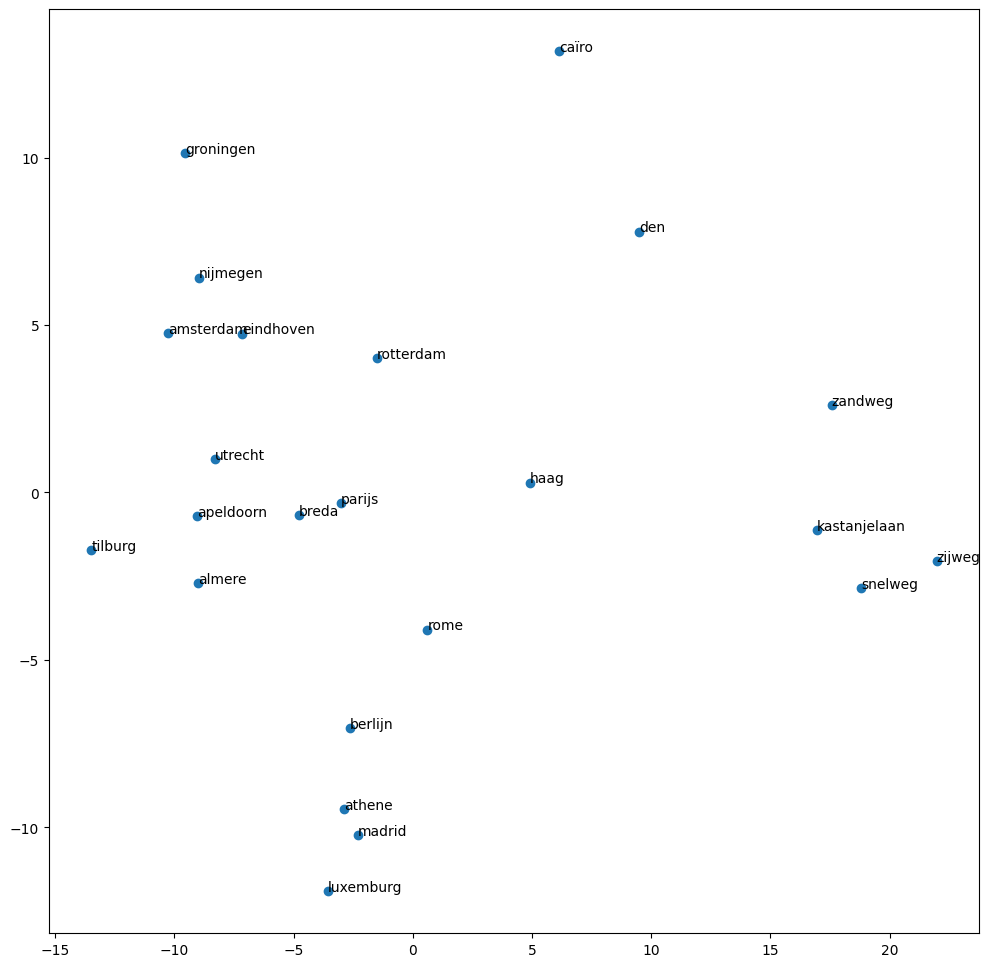

In [48]:
tekst = "Rome Parijs Berlijn Madrid Athene Luxemburg Caïro Amsterdam Rotterdam Den Haag Utrecht Eindhoven Groningen Tilburg Almere Breda Nijmegen Apeldoorn Snelweg Zandweg Kastanjelaan Zijweg"
text_tokens = word_tokenize(tekst.lower()) 
tokens_without_sw = [word for word in text_tokens if not word in stopwoorden]
punctuering = [',', '.', ':', ';']
tokens_zonder_punctuering = [word for word in text_tokens if not word in punctuering]
geschoond = " ".join(tokens_without_sw) 

a = nlp(geschoond)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(a.tensor)
print(result)

plt.figure(figsize=(12,12))
plt.scatter(result[:,0], result[:,1])
for i, word in enumerate(a):
    plt.annotate(a[i].lower_, xy=(result[i, 0], result[i, 1]))
plt.show()


### POS-tagging (part of speech)
Taalkundig ontleden: werkwoorden, bijvoeglijk naamwoorden, werkwoorden etc. 

Redekundige ontleding

In [49]:
doc = nlp("De rechtbank wijst het verzoek toe")
for t in doc:
    print(t, t.pos_, t.dep_)

De DET det
rechtbank NOUN nsubj
wijst VERB ROOT
het DET det
verzoek NOUN obj
toe ADP compound:prt


In [50]:
from spacy import displacy
import IPython
IPython.display.HTML(displacy.render(doc))

### NER: Named Entity Recognition

In teksten staan vaak eigen namen, namen van organisaties, plaatsen, maar ook bedragen en data etc. Spacy herkent deze 'entiteiten' in veel gevallen (maar nog zeker niet foutloos! In Engelse teksten zal de foutmarge wat kleiner zijn.)

In [52]:
doc = nlp("""Mijn naam is Raimond en ik woon in Amersfoort. Het is nu 20 februari 2023 en de tijd is half vier. 
Ik werk op een advocatenkantoor dat Coda Advocaten heet. Nog een half uur om € 1.000.000 op de bank te verdienen """)

for entiteit in doc.ents:
    print("NER:", entiteit, " Dit is een:", entiteit.label_)

NER: Raimond  Dit is een: PERSON
NER: Amersfoort  Dit is een: GPE
NER: 20 februari 2023  Dit is een: DATE
NER: half  Dit is een: TIME
NER: vier  Dit is een: CARDINAL
NER: Coda Advocaten  Dit is een: ORG
NER: half uur  Dit is een: TIME
NER: 1.000.000  Dit is een: CARDINAL
